## Importing Libraries

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [ ]:
# Importing required NLTK libraries
! pip install nltk
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# download all-nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> download all-nltk
Command 'download all-nltk' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all-nltk
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       | 

True

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading data from the drive
train_df = pd.read_csv("/content/drive/MyDrive/yelp_review_dataset/train_dataset.csv")
test_df = pd.read_csv("/content/drive/MyDrive/yelp_review_dataset/test_dataset.csv")

In [ ]:
# labels 0: Negative, 1: Postive 
# train set first 10 rows
train_df.head(5)

,Unnamed: 0,text,label
0,0,"Unfortunately, the frustration of being Dr. Go...",0
1,1,Been going to Dr. Goldberg for over 10 years. ...,1
2,2,I don't know what Dr. Goldberg was like before...,0
3,3,I'm writing this review to give you a heads up...,0
4,4,All the food is great here. But the best thing...,1


## Data Preprocessing

In [ ]:
# stop words
stop_words = stopwords.words("english")
wordnet = WordNetLemmatizer()

In [ ]:
# Data cleansing
def text_prep(text):
  text = text.lower()
  text = ' '.join([word for word in text.split(' ') if word not in stop_words])
  text = text.encode('ascii', 'ignore').decode()
  text = re.sub(r'https*\S+', ' ', text)
  text = re.sub(r'@\S+', ' ', text)
  text = re.sub(r'#\S+', ' ', text)
  text = re.sub(r'\'\w+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub(r'\w*\d+\w*', '', text)
  text = re.sub(r'\s{2,}', ' ', text)
  return text

In [ ]:
# appling the defined function to train and test data
train_df['clean_text'] = train_df.text.apply(text_prep)
test_df['clean_text'] = test_df.text.apply(text_prep)

In [ ]:
train_df.head()

,Unnamed: 0,text,label,clean_text
0,0,"Unfortunately, the frustration of being Dr. Go...",0,unfortunately frustration dr goldberg patient ...
1,1,Been going to Dr. Goldberg for over 10 years. ...,1,going dr goldberg years think one patients sta...
2,2,I don't know what Dr. Goldberg was like before...,0,know dr goldberg like moving arizona let tell ...
3,3,I'm writing this review to give you a heads up...,0,i writing review give heads see doctor office ...
4,4,All the food is great here. But the best thing...,1,food great here best thing wings wings simply ...


In [ ]:
# displaing first five rows of data
test_df.head()

,Unnamed: 0,text,label,clean_text
0,0,"Contrary to other reviews, I have zero complai...",1,contrary reviews zero complaints service price...
1,1,Last summer I had an appointment to get new ti...,0,last summer appointment get new tires wait sup...
2,2,"Friendly staff, same starbucks fair you get an...",1,friendly staff starbucks fair get anywhere els...
3,3,The food is good. Unfortunately the service is...,0,food good unfortunately service hit miss main ...
4,4,Even when we didn't have a car Filene's Baseme...,1,even car filene basement worth bus trip waterf...


In [ ]:
# splitting data train, test and labels
X_train = train_df['clean_text']
y_train = train_df['label']

X_test = test_df['clean_text']
y_test = test_df['label']

## Implementing SVM

In [ ]:
# Implementing TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
# Train the model
clf = LinearSVC()
svc_model = clf.fit(X_train, y_train) 

## Saving model weights using Pickle

In [ ]:
import pickle
# save the model to disk
with open('pickled_data_file.pkl', 'wb') as sentiment_svm:
     pickle.dump(svc_model, sentiment_svm)

In [ ]:
#Read the data from the file
#with open('pickled_data_file.pkl', 'rb') as sentiment_svm:
     #weights = pickle.load(sentiment_svm)

## Model Evaluation

In [ ]:
# Form a prediction set
pred_test = svc_model.predict(X_test)

In [ ]:
# Print the classification report
target_names = ['class 0', 'class 1']
cls_rep = (classification_report(y_test, pred_test, target_names = target_names))
print(cls_rep)

              precision    recall  f1-score   support

     class 0       0.93      0.93      0.93     19000
     class 1       0.93      0.93      0.93     19000

    accuracy                           0.93     38000
   macro avg       0.93      0.93      0.93     38000
weighted avg       0.93      0.93      0.93     38000



In [ ]:
# Report the confusion matrix
cm = confusion_matrix(y_test, pred_test)
print(cm)

[[17715  1285]
 [ 1281 17719]]


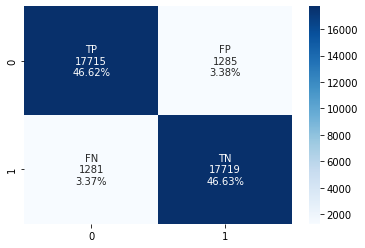

In [ ]:
# Plotting confusion matrix
group_names = ["TP","FP","FN","TN"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [ ]:
print("End of the notebook. \nThe nextbook will be the Sentiment Analysis using Deep Learning")


End of the notebook. 
The nextbook will be the Sentiment Analysis using Deep Learning
